In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


# Classification Model Evaluation
# Accuracy
# Area Under the Curve ROC
# Confussion Matrix
# Classification report


## Accuracy:

In [34]:
df = pd.read_csv("cleanHeartData.csv")

In [35]:
df = df.drop("Unnamed: 0", axis = 1)
df = df.drop_duplicates()

In [36]:
df.head()

,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak,target
0,52,1,125,212,0,168,0,1.0,0
1,53,1,140,203,1,155,1,3.1,0
2,70,1,145,174,0,125,1,2.6,0
3,61,1,148,203,0,161,0,0.0,0
4,62,0,138,294,1,106,0,1.9,0


In [37]:
df.shape

(302, 9)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed()

x = df.drop('target',axis=1) # using heart disease data
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model =  RandomForestClassifier().fit(x_train,y_train)

model.score(x_test,y_test)

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model, x,y , cv = 5 , scoring= None))

0.7813114754098361

# ROC Curve

In [7]:
#create test train data 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve

x = df.drop('target',axis=1) # using heart disease data
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
model = clf.fit(x_train,y_train)

y_probab = clf.predict_proba(x_test)

In [8]:
y_probab_p = y_probab[:,1]

In [9]:
# True positive :  Truth  = 1  , Model = 1
# False positive :  Truth  = 0  , Model = 1
# True negitive :  Truth  = 0  , Model = 0
# False negitive :  Truth  = 1  , Model = 0

In [10]:
# calculate fpr , tpr , threshold : 
fpr, tpr, threshold = roc_curve(y_test, y_probab_p)

In [11]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04545455, 0.04545455, 0.04545455,
       0.04545455, 0.04545455, 0.04545455, 0.09090909, 0.09090909,
       0.13636364, 0.13636364, 0.18181818, 0.18181818, 0.22727273,
       0.22727273, 0.40909091, 0.40909091, 0.45454545, 0.5       ,
       0.54545455, 0.59090909, 0.68181818, 1.        ])

In [12]:
#create a function for ploting  using matplot lib
def plot_roc(fpr,tpr):

    # plot roc curve
    plt.plot(fpr,tpr,color= "red",label = "ROC")

    #coustomization
    plt.title("Area Under the ROC Curve")
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Curve (tpr)")
    plt.legend()
    plt.show()

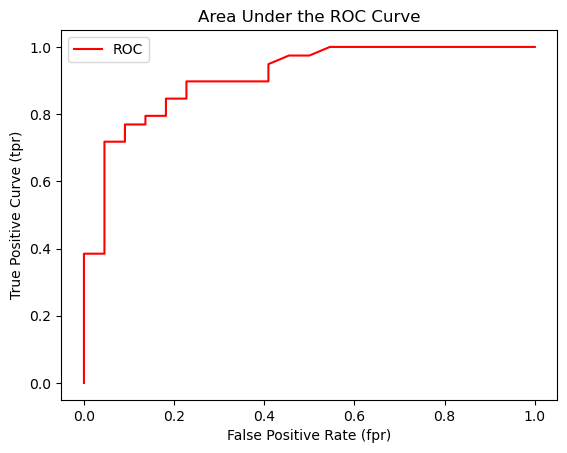

In [13]:
plot_roc(fpr,tpr)

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probab_p) # Are of the curve 

0.9102564102564102

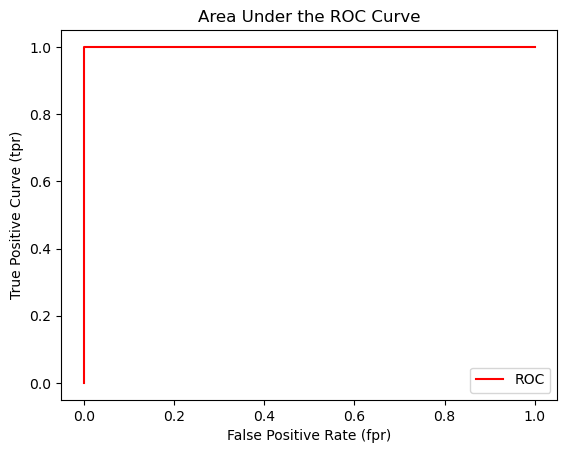

In [15]:
fpr ,tpr, threshold = roc_curve(y_test,y_test)
plot_roc(fpr,tpr)

# Confusion Matrix

In [16]:
# confusion matix tells you where your model is confused or has lost his mind
## Case 1  Yes : True Positive : Truth = 1 and  Model = 1    he got it right
## Case 2 Opps : False Positive : Truth = 0 and  Model = 1   he lost his mind
## Case 3 Yes : True Negitive  : Truth = 0 and  Model = 0    he got it right
## Case 4 Opps: False  Negitive : Truth = 1 and  Model = 0   he lost his mind

In [17]:
from sklearn.metrics import confusion_matrix

y_predicted = clf.predict(x_test)
confusion_matrix(y_test,y_predicted)

array([[17,  5],
       [ 6, 33]], dtype=int64)

In [18]:
# case 3 , 1 have 21 and 25 values respectively
# case 4, 2  have  6 and 9 values respectively

In [19]:
# better visualization
pd.crosstab(y_test, y_predicted,
           rownames = ['Truth'],
           colnames=['Predicted'])

Predicted,0,1
Truth,,
0,17,5
1,6,33


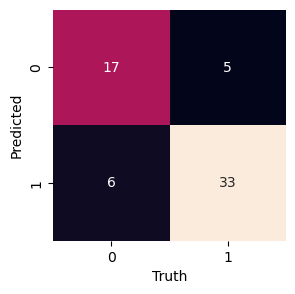

In [20]:
conf_mat = confusion_matrix(y_test, y_predicted)

def plot_confmatrix (conf_mat):
    """
    This Fuctions Plots Confusion Matrix
    """

    fig , ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat, annot= True , cbar = False)
    plt.xlabel("Truth")
    plt.ylabel("Predicted")
    plt.show()

plot_confmatrix(conf_mat)

# Classification Report

In [21]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.87      0.85      0.86        39

    accuracy                           0.82        61
   macro avg       0.80      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



# Regression model Evaluation mtrics
# 1. R^2
## Compares Your Model Prediction to the mean for you target
# 2. Mean Absolute Error (MSE)
# 3. Mean Squared Error (MSE)

In [52]:
# R^2
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

housing= fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing['target']

np.random.seed()

x = df.drop('target',axis=1)
y = df['target']

#split test train
X_train,X_test,y_train,y_test = train_test_split(x,y , test_size=0.2)
rfr = RandomForestRegressor()
housin_model = rfr.fit(X_train,y_train)

housin_model.score(X_test,y_test)

0.8094594487385776

In [45]:
# MAE: Is the average of the absolute (plus) difference betweeen predicted and actual values
from sklearn.metrics import mean_absolute_error
y_predicted = housin_model.predict(X_test)
mae = mean_absolute_error(y_test,y_predicted)

In [46]:
mae

0.33914577921511646

In [47]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [48]:
df = pd.DataFrame(data = {"actualvalues" : y_test , "predicted_values" : y_predicted})
df['diffrence'] = df['actualvalues']-df['predicted_values']
df  # tell how wrong our model is 
 # minimize this value

,actualvalues,predicted_values,diffrence
20528,2.232,1.745970,0.486030
7236,1.565,1.613760,-0.048760
13110,1.544,1.901620,-0.357620
3472,4.318,4.973870,-0.655870
11166,2.521,1.955560,0.565440
...,...,...,...
3848,2.464,2.776270,-0.312270
5778,1.786,2.126250,-0.340250
8938,4.629,4.127192,0.501808
12749,1.661,1.098930,0.562070


# Mean Square Error for regression problem

In [49]:
from sklearn.metrics import mean_squared_error
y_predicted= housin_model.predict(X_test)
mse = mean_squared_error(y_test,y_predicted)
mse

0.26958555261896755

In [50]:
mse_manual = np.square(df['diffrence'])
mse_manual.mean()

0.26958555261896755

# Scorring parameters for classification

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


x = df.drop('target',axis=1)
y= df['target']

clf = RandomForestClassifier()
cross_acc = cross_val_score(clf,x,y,cv=5 , scoring=None)
cross_acc.mean()

0.7911475409836066

In [40]:
# accuracy
cross_acc = cross_val_score(clf,x,y,cv=5 , scoring='accuracy')
cross_acc.mean()

0.7614207650273224

In [41]:
# precision 
cross_acc = cross_val_score(clf,x,y,cv=5 , scoring='precision') 
cross_acc.mean()

0.7773356549827138

In [42]:
# recall
cross_acc = cross_val_score(clf,x,y,cv=5 , scoring='recall')
cross_acc.mean()

0.8113636363636363

In [43]:
# f1 
cross_acc = cross_val_score(clf,x,y,cv=5 , scoring='f1')
cross_acc.mean()

0.7990931895146118

# Scoring parameters for Regression

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

housing= fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing['target']

x = df.drop('target',axis=1)
y = df['target']


rfr = RandomForestRegressor()
cross_acc = cross_val_score(rfr,x,y,cv=5 , scoring=None)
cross_acc.mean()

0.6491103905534895

In [3]:
np.random.seed()
cross_acc = cross_val_score(rfr,x,y,cv=5 , scoring='r2')
cross_acc.mean()

0.6478140041304676

In [4]:
np.random.seed()
cross_acc = cross_val_score(rfr,x,y,cv=5 , scoring='neg_mean_absolute_error')
cross_acc.mean()

-0.46712016632751946

In [ ]:
np.random.seed()
cross_acc = cross_val_score(rfr,x,y,cv=5 , scoring='neg_mean_squared_error')
cross_acc.mean()

# Using Different Evaluation Matrics as sklearn Functions Clssification problems

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(7)

In [3]:
df_heart = pd.read_csv("cleanHeartData.csv")

In [5]:
df_heart.drop("Unnamed: 0",axis=1 ,inplace=True)

In [7]:
df_heart.head()

,age,sex,resting_blood_pressure,cholestoral,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina,oldpeak,target
0,52,1,125,212,0,168,0,1.0,0
1,53,1,140,203,1,155,1,3.1,0
2,70,1,145,174,0,125,1,2.6,0
3,61,1,148,203,0,161,0,0.0,0
4,62,0,138,294,1,106,0,1.9,0


In [10]:
#splittig data 
x = df_heart.drop("target",axis=1)
y = df_heart['target']

# making test and train
x_train , x_test, y_train, y_test = train_test_split(x,y , test_size=0.2)

#instanciate the model 
clf = RandomForestClassifier()

#fit the model 
model = clf.fit(x_train,y_train)

#lets make prediction
y_predicted = clf.predict(x_test)

# evaluating the model using sklearn functions
print(f'Accuracy Score : {accuracy_score(y_test,y_predicted)}')
print(f'Precision score : {precision_score(y_test,y_predicted)}')
print(f'Recall Score : {recall_score(y_test,y_predicted)}')
print(f'f1 Score : {f1_score(y_test,y_predicted)}')

Accuracy Score : 0.7540983606557377
Precision score : 0.7741935483870968
Recall Score : 0.75
f1 Score : 0.7619047619047619


## Regression Evaluation Functions

In [14]:
from sklearn.metrics import r2_score,mean_absolute_error ,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

np.random.seed()

# creating data frame of  california housing 
housing= fetch_california_housing()
df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
# splitting data into target and features
x = df.drop('target',axis=1)
y = df['target']

# split it into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# create model instence
rfr = RandomForestRegressor()

# fit model 
model = rfr.fit(x_train,y_train)

# make prediction 
y_predicted = model.predict(x_test)

# we run regression evaluation functions
print(f'r2 score : {r2_score(y_test,y_predicted)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_predicted)}')
print(f'Mean Square Error : {mean_squared_error(y_test,y_predicted)}')

r2 score : 0.804120621161988
Mean Absolute Error : 0.3371946576065894
Mean Square Error : 0.26774183817640673
